<a href="https://colab.research.google.com/github/AKHILM20DS007/AKHILM20DS007/blob/main/WHAT_IF_LINEAR_REGRESSION_APPLIED_TO_MULTICLASS_PROBLEM_NBA_PLAYERS_INJURY_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [210]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [211]:

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve, accuracy_score
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-dark')

In [212]:
df = pd.read_csv('/content/drive/MyDrive/1Major project/injuries_2010-2020.csv')

This dataset contains NBA players' injuries between 2010 and 2020.

First injury record was recorded on October 2010 and the last one on October 2020.

To find out the injury history of the active NBA players (21-22 season), we'll import the active players dataset and merge them.

In [213]:
df.tail()

,Date,Team,Acquired,Relinquished,Notes
27100,30-09-2020,Lakers,Dion Waiters,NaN,activated from IL
27101,02-10-2020,Heat,NaN,Bam Adebayo,strained neck (DTD)
27102,02-10-2020,Heat,NaN,Goran Dragic,placed on IL with torn plantar fascia in left ...
27103,02-10-2020,Heat,Chris Silva,NaN,activated from IL
27104,06-10-2020,Heat,Bam Adebayo,NaN,returned to lineup


In [214]:
df.head()

,Date,Team,Acquired,Relinquished,Notes
0,03-10-2010,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...
1,06-10-2010,Pistons,NaN,Jonas Jerebko,torn right Achilles tendon (out indefinitely)
2,06-10-2010,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...
3,08-10-2010,Blazers,NaN,Jeff Ayres,torn ACL in right knee (out indefinitely)
4,08-10-2010,Nets,NaN,Troy Murphy,strained lower back (out indefinitely)


In [215]:
df.isnull().sum()

Date                0
Team                2
Acquired        17563
Relinquished     9545
Notes               0
dtype: int64

We will drop the Acquired and Relinquished columns and combine them under the column "Name"

In [216]:
df['Name'] = df[["Acquired","Relinquished"]].fillna('').sum(axis=1)

In [217]:
df = df.drop(columns=['Acquired', 'Relinquished'])

df.head()

,Date,Team,Notes,Name
0,03-10-2010,Bulls,fractured bone in right pinky finger (out inde...,Carlos Boozer
1,06-10-2010,Pistons,torn right Achilles tendon (out indefinitely),Jonas Jerebko
2,06-10-2010,Pistons,broken fifth metatarsal in right foot (out ind...,Terrico White
3,08-10-2010,Blazers,torn ACL in right knee (out indefinitely),Jeff Ayres
4,08-10-2010,Nets,strained lower back (out indefinitely),Troy Murphy


In [218]:
df.isnull().sum()

Date     0
Team     2
Notes    0
Name     0
dtype: int64

In [219]:
df["Team"].value_counts()

Spurs           1163
Bucks           1068
Warriors        1060
Rockets         1058
Raptors         1044
Celtics         1040
Nets            1024
Heat            1023
Cavaliers       1001
Mavericks        992
Hawks            975
Nuggets          966
Lakers           959
Knicks           943
76ers            910
Wizards          875
Grizzlies        875
Timberwolves     860
Jazz             841
Magic            834
Pacers           831
Bulls            791
Suns             733
Kings            728
Hornets          719
Clippers         718
Thunder          717
Pistons          714
Blazers          695
Pelicans         576
Bobcats          369
Bullets            1
Name: Team, dtype: int64

Changing the team names to full names.

In [220]:
dict = {"Rockets":"Houston Rockets",
        "Magic":"Orlando Magic",
        "Nets":"Brooklyn Nets",
        "76ers":"Philadelphia Sixers",
        "Cavaliers":"Cleveland Cavaliers",
        "Kings":"Sacramento Kings",
        "Pacers":"Indiana Pacers",
        "Bucks":"Milwaukee Bucks",
        "Celtics":"Boston Celtics",
        "Pelicans":"New Orleans Pelicans",
        "Clippers":"Los Angeles Clippers",
        "Nuggets":"Denver Nuggets",
        "Wizards":"Washington Wizards",
        "Bullets":"Washington Bullets",
        "Thunder":"Oklahoma City Thunder",
        "Raptors":"Toronto Raptors",
        "Bulls":"Chicago Bulls",
        "Lakers":"Los Angeles Lakers",
        "Grizzlies":"Memphis Grizzlies",
        "Hawks":"Atlanta Hawks",
        "Heat":"Miami Heat",
        "Spurs":"San Antonio Spurs",
        "Mavericks":"Dallas Mavericks",
        "Jazz":"Utah Jazz",
        "Hornets":"Charlotte Hornets",
        "Bobcats":"Charlotte Bobcats",
        "Pistons":"Detroit Pistons",
        "Warriors":"Golden State Warriors",
        "Timberwolves":"Minnesota Timberwolves",
        "Suns":"Phoenix Suns",
        "Knicks":"New York Knicks",
        "Blazers":"Portland Trailblazers"
    
}

In [221]:
df["Team"].replace(dict, inplace=True)

df.tail(10)

,Date,Team,Notes,Name
27095,12-09-2020,Houston Rockets,placed on IL with neck spasms (out for season),Tyson Chandler
27096,18-09-2020,Boston Celtics,placed on IL with strained right adductor (out...,Romeo Langford
27097,22-09-2020,Boston Celtics,surgery on right wrist (out for season),Romeo Langford
27098,23-09-2020,Miami Heat,sore right knee (DTD),Gabe Vincent
27099,30-09-2020,Miami Heat,strained left shoulder (DTD),Bam Adebayo
27100,30-09-2020,Los Angeles Lakers,activated from IL,Dion Waiters
27101,02-10-2020,Miami Heat,strained neck (DTD),Bam Adebayo
27102,02-10-2020,Miami Heat,placed on IL with torn plantar fascia in left ...,Goran Dragic
27103,02-10-2020,Miami Heat,activated from IL,Chris Silva
27104,06-10-2020,Miami Heat,returned to lineup,Bam Adebayo


In [222]:
df["Team"].value_counts()

San Antonio Spurs         1163
Milwaukee Bucks           1068
Golden State Warriors     1060
Houston Rockets           1058
Toronto Raptors           1044
Boston Celtics            1040
Brooklyn Nets             1024
Miami Heat                1023
Cleveland Cavaliers       1001
Dallas Mavericks           992
Atlanta Hawks              975
Denver Nuggets             966
Los Angeles Lakers         959
New York Knicks            943
Philadelphia Sixers        910
Washington Wizards         875
Memphis Grizzlies          875
Minnesota Timberwolves     860
Utah Jazz                  841
Orlando Magic              834
Indiana Pacers             831
Chicago Bulls              791
Phoenix Suns               733
Sacramento Kings           728
Charlotte Hornets          719
Los Angeles Clippers       718
Oklahoma City Thunder      717
Detroit Pistons            714
Portland Trailblazers      695
New Orleans Pelicans       576
Charlotte Bobcats          369
Washington Bullets           1
Name: Te

Changing the order of the rows

In [223]:
df = df[["Name", "Team", "Date", "Notes"]]

df.tail()

,Name,Team,Date,Notes
27100,Dion Waiters,Los Angeles Lakers,30-09-2020,activated from IL
27101,Bam Adebayo,Miami Heat,02-10-2020,strained neck (DTD)
27102,Goran Dragic,Miami Heat,02-10-2020,placed on IL with torn plantar fascia in left ...
27103,Chris Silva,Miami Heat,02-10-2020,activated from IL
27104,Bam Adebayo,Miami Heat,06-10-2020,returned to lineup


In [224]:
df.dtypes

Name     object
Team     object
Date     object
Notes    object
dtype: object

Changing the "Date" column to datetime to be able to format the dates.

In [225]:
df['Date'] = pd.to_datetime(df.Date)

df['Date'] = df['Date'].dt.strftime('%d/%m/%Y')

df.tail()

,Name,Team,Date,Notes
27100,Dion Waiters,Los Angeles Lakers,30/09/2020,activated from IL
27101,Bam Adebayo,Miami Heat,10/02/2020,strained neck (DTD)
27102,Goran Dragic,Miami Heat,10/02/2020,placed on IL with torn plantar fascia in left ...
27103,Chris Silva,Miami Heat,10/02/2020,activated from IL
27104,Bam Adebayo,Miami Heat,10/06/2020,returned to lineup


In [226]:
df.dtypes

Name     object
Team     object
Date     object
Notes    object
dtype: object

Importing active player dataset for 21-22 season.

This dataset includes Name, Team, Position, Age, Height, Weight, College and Salary information of the 2021-22 season NBA players.

We will only use Name, Team and Position information for now.

In [227]:
df_act = pd.read_csv("/content/drive/MyDrive/1Major project/active_players_2.csv")

#df_act = df_act[["Name","Team","Position"]]

df_act.head()

,Name,Team,Position,Age,Height,Height_i,Weight,College,Salary
0,Juhann Begarin,Boston Celtics,SG,19,"6' 5""",6.50,185,NaN,NaN
1,Jaylen Brown,Boston Celtics,SG,24,"6' 6""",6.60,223,California,26758928.0
2,Kris Dunn,Boston Celtics,PG,27,"6' 3""",6.30,205,Providence,5005350.0
3,Carsen Edwards,Boston Celtics,PG,23,"5' 11""",5.11,200,Purdue,1782621.0
4,Tacko Fall,Boston Celtics,C,25,"7' 5""",7.50,311,UCF,NaN


In [228]:
df_act = df_act[["Name","Team","Position"]]

df_act.head()

,Name,Team,Position
0,Juhann Begarin,Boston Celtics,SG
1,Jaylen Brown,Boston Celtics,SG
2,Kris Dunn,Boston Celtics,PG
3,Carsen Edwards,Boston Celtics,PG
4,Tacko Fall,Boston Celtics,C


Merging the datasets by performing a left merge on Name.

In [229]:
result_df = pd.merge(df_act, df, how= "left", on=["Name"])
result_df = result_df[result_df['Date'].notna()]

result_df.head()

,Name,Team_x,Position,Team_y,Date,Notes
1,Jaylen Brown,Boston Celtics,SG,Boston Celtics,01/11/2017,sprained right ankle (DTD)
2,Jaylen Brown,Boston Celtics,SG,Boston Celtics,13/01/2017,returned to lineup
3,Jaylen Brown,Boston Celtics,SG,Boston Celtics,13/02/2017,placed on IL with strained right hip flexor
4,Jaylen Brown,Boston Celtics,SG,Boston Celtics,24/02/2017,activated from IL
5,Jaylen Brown,Boston Celtics,SG,Boston Celtics,12/06/2017,placed on IL with right eye inflammation


In [230]:
result_df.tail()

,Name,Team_x,Position,Team_y,Date,Notes
9489,Hassan Whiteside,Utah Jazz,C,Portland Trailblazers,13/01/2020,returned to lineup
9490,Hassan Whiteside,Utah Jazz,C,Portland Trailblazers,02/07/2020,bruised left leg (DTD)
9491,Hassan Whiteside,Utah Jazz,C,Portland Trailblazers,02/11/2020,returned to lineup
9492,Hassan Whiteside,Utah Jazz,C,Portland Trailblazers,08/08/2020,placed on IL with strained left hip
9493,Hassan Whiteside,Utah Jazz,C,Portland Trailblazers,08/11/2020,activated from IL


9493 injury records of active players are available

Looking for a specific player's injury records for the last 10 years

# # we will Clear Null entries/ values now

In [231]:
result_df
#result_df.isnull().sum()

,Name,Team_x,Position,Team_y,Date,Notes
1,Jaylen Brown,Boston Celtics,SG,Boston Celtics,01/11/2017,sprained right ankle (DTD)
2,Jaylen Brown,Boston Celtics,SG,Boston Celtics,13/01/2017,returned to lineup
3,Jaylen Brown,Boston Celtics,SG,Boston Celtics,13/02/2017,placed on IL with strained right hip flexor
4,Jaylen Brown,Boston Celtics,SG,Boston Celtics,24/02/2017,activated from IL
5,Jaylen Brown,Boston Celtics,SG,Boston Celtics,12/06/2017,placed on IL with right eye inflammation
...,...,...,...,...,...,...
9489,Hassan Whiteside,Utah Jazz,C,Portland Trailblazers,13/01/2020,returned to lineup
9490,Hassan Whiteside,Utah Jazz,C,Portland Trailblazers,02/07/2020,bruised left leg (DTD)
9491,Hassan Whiteside,Utah Jazz,C,Portland Trailblazers,02/11/2020,returned to lineup
9492,Hassan Whiteside,Utah Jazz,C,Portland Trailblazers,08/08/2020,placed on IL with strained left hip


In [232]:
result_df[result_df["Name"] == "Jaylen Brown"]

,Name,Team_x,Position,Team_y,Date,Notes
1,Jaylen Brown,Boston Celtics,SG,Boston Celtics,01/11/2017,sprained right ankle (DTD)
2,Jaylen Brown,Boston Celtics,SG,Boston Celtics,13/01/2017,returned to lineup
3,Jaylen Brown,Boston Celtics,SG,Boston Celtics,13/02/2017,placed on IL with strained right hip flexor
4,Jaylen Brown,Boston Celtics,SG,Boston Celtics,24/02/2017,activated from IL
5,Jaylen Brown,Boston Celtics,SG,Boston Celtics,12/06/2017,placed on IL with right eye inflammation
6,Jaylen Brown,Boston Celtics,SG,Boston Celtics,12/08/2017,activated from IL
7,Jaylen Brown,Boston Celtics,SG,Boston Celtics,21/12/2017,sore left Achilles (DTD)
8,Jaylen Brown,Boston Celtics,SG,Boston Celtics,23/12/2017,returned to lineup
9,Jaylen Brown,Boston Celtics,SG,Boston Celtics,27/12/2017,placed on IL
10,Jaylen Brown,Boston Celtics,SG,Boston Celtics,27/12/2017,sore right knee (DTD)


In [233]:
result_df.describe()

,Name,Team_x,Position,Team_y,Date,Notes
count,9280,9280,9280,9280,9280,9280
unique,344,30,7,31,1734,1552
top,Kevin Love,Los Angeles Lakers,C,Boston Celtics,04/12/2017,activated from IL
freq,139,715,1943,458,35,2480


In [234]:
result_df.isnull().sum()

Name        0
Team_x      0
Position    0
Team_y      0
Date        0
Notes       0
dtype: int64

In [235]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9280 entries, 1 to 9493
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      9280 non-null   object
 1   Team_x    9280 non-null   object
 2   Position  9280 non-null   object
 3   Team_y    9280 non-null   object
 4   Date      9280 non-null   object
 5   Notes     9280 non-null   object
dtypes: object(6)
memory usage: 507.5+ KB


##Saved file: Injury_History.csv

In [236]:
filename = 'CREATED Active Players Injury_History.csv'

result_df.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: CREATED Active Players Injury_History.csv


In [237]:
result_df

,Name,Team_x,Position,Team_y,Date,Notes
1,Jaylen Brown,Boston Celtics,SG,Boston Celtics,01/11/2017,sprained right ankle (DTD)
2,Jaylen Brown,Boston Celtics,SG,Boston Celtics,13/01/2017,returned to lineup
3,Jaylen Brown,Boston Celtics,SG,Boston Celtics,13/02/2017,placed on IL with strained right hip flexor
4,Jaylen Brown,Boston Celtics,SG,Boston Celtics,24/02/2017,activated from IL
5,Jaylen Brown,Boston Celtics,SG,Boston Celtics,12/06/2017,placed on IL with right eye inflammation
...,...,...,...,...,...,...
9489,Hassan Whiteside,Utah Jazz,C,Portland Trailblazers,13/01/2020,returned to lineup
9490,Hassan Whiteside,Utah Jazz,C,Portland Trailblazers,02/07/2020,bruised left leg (DTD)
9491,Hassan Whiteside,Utah Jazz,C,Portland Trailblazers,02/11/2020,returned to lineup
9492,Hassan Whiteside,Utah Jazz,C,Portland Trailblazers,08/08/2020,placed on IL with strained left hip


In [238]:
X=result_df.iloc[:,:-1].values
Y=result_df.iloc[:,-1].values

print(X)
print(Y)

[['Jaylen Brown' 'Boston Celtics' 'SG' 'Boston Celtics' '01/11/2017']
 ['Jaylen Brown' 'Boston Celtics' 'SG' 'Boston Celtics' '13/01/2017']
 ['Jaylen Brown' 'Boston Celtics' 'SG' 'Boston Celtics' '13/02/2017']
 ...
 ['Hassan Whiteside' 'Utah Jazz' 'C' 'Portland Trailblazers' '02/11/2020']
 ['Hassan Whiteside' 'Utah Jazz' 'C' 'Portland Trailblazers' '08/08/2020']
 ['Hassan Whiteside' 'Utah Jazz' 'C' 'Portland Trailblazers' '08/11/2020']]
['sprained right ankle (DTD)' 'returned to lineup'
 'placed on IL with strained right hip flexor' ... 'returned to lineup'
 'placed on IL with strained left hip' 'activated from IL']


## LABEL ENCODING TO CONVERT STRING TO INT

In [239]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
result_df['Name']= label_encoder.fit_transform(result_df['Name'])

result_df['Name'].unique()


array([154, 205, 302,  34,   3, 103, 222, 276, 139, 175,  80, 227, 156,
       271, 211,  33, 161, 249, 285, 195,  22, 146, 163, 210,   8, 147,
       327, 313, 262, 264, 141,  96,   5, 108, 303, 148, 246, 111, 253,
       177, 238,  85, 190, 288,  10, 165,  64, 314, 113, 290, 121,  20,
       232, 200, 131,  46, 284, 124, 294, 258, 119, 112, 340, 283, 217,
       316, 324,   6,  74,  54, 153,  84, 342,   2,  82, 251, 151,  60,
        68, 197, 214,  42, 269,  76,  99, 128, 159, 109, 173,  53, 322,
       275, 188,  81, 123, 254, 223, 318, 178, 160,  40, 187, 300, 136,
       101, 242, 301, 127, 122, 309, 259,  92, 120, 176, 274, 179, 273,
        32, 201, 286,  24, 158,  17,  25,  50, 126,  63, 292, 196,  72,
        37, 218,  79, 319,  21, 125, 335,  51, 189, 231, 307, 133,  28,
       257,  18, 162,  89, 329, 326, 209, 229, 330, 233, 256, 114, 239,
       333, 235, 228, 117, 167, 272,  44, 306,  29,  70, 310, 194, 293,
        61, 281, 241, 208, 116, 266, 169, 245,  47, 295,  95,  1

In [240]:
result_df['Team_x']= label_encoder.fit_transform(result_df['Team_x'])

result_df['Team_x'].unique()

array([ 1,  2, 19, 22, 27,  4,  5,  8, 11, 16,  0,  3, 15, 21, 29,  9, 12,
       13, 23, 25,  6, 10, 14, 18, 26,  7, 17, 20, 24, 28])

In [241]:
result_df['Position']= label_encoder.fit_transform(result_df['Position'])

result_df['Position'].unique()


array([6, 4, 0, 1, 3, 5, 2])

In [242]:
result_df['Team_y']= label_encoder.fit_transform(result_df['Team_y'])

result_df['Team_y'].unique()


array([ 1, 18,  5,  0, 23, 29, 21, 20, 17, 30, 26, 16, 25, 27,  9, 15,  2,
       10, 13, 11,  6, 22, 12, 28, 24,  8, 19,  4,  7, 14,  3])

In [243]:
result_df['Date']= label_encoder.fit_transform(result_df['Date'])

result_df['Date'].unique()


array([  92,  730,  736, ...,  322,  249, 1539])

In [244]:
result_df['Notes']= label_encoder.fit_transform(result_df['Notes'])

result_df['Notes'].unique()

array([1225,  989,  860, ..., 1543, 1323, 1181])

In [245]:
X = np.array(result_df[['Name']])  ## feature

In [246]:
X.shape

(9280, 1)

In [247]:
Y = np.array(result_df['Notes'])   ## target

In [248]:
Y.shape

(9280,)

In [249]:
result_df.isnull().sum() # checking null values

Name        0
Team_x      0
Position    0
Team_y      0
Date        0
Notes       0
dtype: int64

In [250]:
result_df.dtypes

Name        int64
Team_x      int64
Position    int64
Team_y      int64
Date        int64
Notes       int64
dtype: object

In [251]:
result_df

,Name,Team_x,Position,Team_y,Date,Notes
1,154,1,6,1,92,1225
2,154,1,6,1,730,989
3,154,1,6,1,736,860
4,154,1,6,1,1336,10
5,154,1,6,1,670,634
...,...,...,...,...,...,...
9489,130,28,0,25,733,989
9490,130,28,0,25,164,69
9491,130,28,0,25,201,989
9492,130,28,0,25,486,832


In [252]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,random_state=235)

#print(X_train)
print(X_test)
#print(Y_train)
print(Y_test)

[[162]
 [185]
 [251]
 ...
 [246]
 [165]
 [ 73]]
[ 10 349 989 ...  10 989  10]


In [253]:
print (X)

[[154]
 [154]
 [154]
 ...
 [130]
 [130]
 [130]]


In [254]:
print (Y)

[1225  989  860 ...  989  832   10]


In [255]:
X_train


array([[  3],
       [241],
       [269],
       ...,
       [175],
       [ 55],
       [190]])

In [256]:
#### Build the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [257]:
### Fit the model (Train the model)
model.fit(X_train,Y_train)

LinearRegression()

In [258]:
### Testing (Prediction)
ypred = model.predict(X_test)
ypred

array([558.61129176, 556.63035124, 550.94591325, ..., 551.37655249,
       558.35290821, 566.27667026])

In [259]:
#Y_test.values 


## showing n-d array error 

# calculate accuracy

In [260]:
### Calculate R2 Score
from sklearn.metrics import r2_score
r2 = r2_score(Y_test,ypred)
r2

0.0009866639938033162

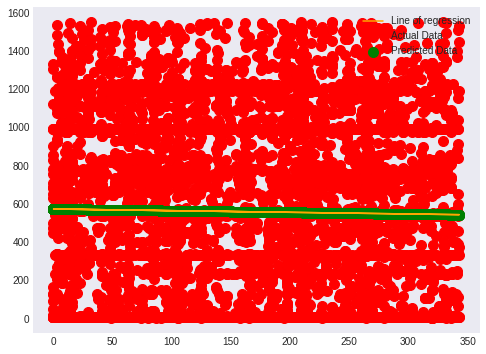

In [261]:
### Plot Line of Regression for Training Samples
plt.figure(figsize=(8,6))
plt.scatter(X_train,Y_train,color='red',s=100,label="Actual Data")
plt.scatter(X_train,model.predict(X_train),color='green',s=100,label="Predicted Data")
plt.plot(X_train,model.predict(X_train),color='orange',label="Line of regression")
plt.legend()
plt.show()

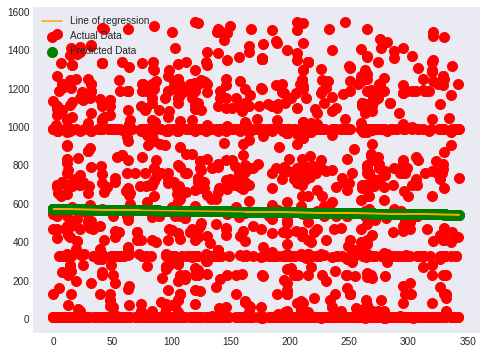

In [262]:
plt.figure(figsize=(8,6))
plt.scatter(X_test,Y_test,color='red',s=100,label="Actual Data")
plt.scatter(X_test,model.predict(X_test),color='green',s=100,label="Predicted Data")
plt.plot(X_test,model.predict(X_test),color='orange',label="Line of regression")
plt.legend()
plt.show()

In [263]:
## equation of a line  that we have got in above (y=mx+c , m and c values )
m = model.coef_
c = model.intercept_
print(m,c)

[-0.08612785] 572.5640031931184


Now change random state value so that training and testing samples get changed and there will be change in the accuracy. (this is one of the technique to improve accuracy(cross validation))

In [264]:
accuracy = []
for i in range(10000):
  X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,random_state=i)
  model1 = LinearRegression() ## create the model
  model1.fit(X_train,Y_train) ## fit the model
  ypred1 = model.predict(X_test) ## calculate the prediction of the model
  r2_1 = r2_score(Y_test,ypred) ## calculate accuracy
  accuracy.append(r2_1)

In [265]:
accuracy

[0.00042434193379614626,
 -0.001153597197648626,
 -0.0004972216556347053,
 -0.0012174152117416792,
 0.0001809763330508085,
 -0.0011791005269035093,
 -0.002300900488016344,
 2.752133393080225e-05,
 -0.0019252174932367083,
 -0.0027319243546524152,
 -0.0006942064987813801,
 -0.0005562455684524625,
 -0.0017546717907825915,
 -4.9002848891976925e-06,
 0.0002148075200525401,
 -0.0011296250437287103,
 -0.0006189417437880707,
 -0.000323775199503773,
 0.0005302151604710259,
 0.000897456479430625,
 -0.00016996568633964593,
 -0.0007651316791852381,
 -0.0012547842402790277,
 0.0010575785122685089,
 0.00033428415599567884,
 0.0007256688231079833,
 0.0002174476207321696,
 2.1188054173504334e-05,
 -0.0004576861451996983,
 -0.0017700969621530227,
 0.0008025874761410368,
 -0.0005903569377869733,
 -0.0005385698455449006,
 -0.0010699199590757935,
 -0.0013026146045789222,
 -0.0016279712672799818,
 -1.537206985746664e-05,
 -0.0006960412832730523,
 -0.0012208530340147572,
 -0.0010417047162658566,
 -5.5887357

In [266]:
np.max(accuracy)

0.002374912427097642

In [267]:
np.argmax(accuracy)

8185

#save the newly created file with joblib libraary

In [268]:
#### save the model
import joblib
joblib.dump(model,'NBA injuries.pkl')

['NBA injuries.pkl']

In [269]:
### Load the model
mymodel = joblib.load("/content/NBA injuries.pkl")

In [270]:
### Test New Data
mymodel.predict([[11]])

array([571.61659686])

In [271]:
mymodel.predict([[11]])[0]

571.616596861058

In [272]:
mymodel.predict([[11],[13],[18]]) ## injury for 11th, 13th, 18th person

array([571.61659686, 571.44434116, 571.01370192])